# Mushroom Classification 

In [39]:
# import libraries 
import numpy as np 
import pandas as pd
import warnings
import seaborn as sns
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('ggplot')
%matplotlib inline

In [2]:
#import dataset 
dataset = pd.read_csv('mushrooms.csv')
dataFrame = dataset

In [3]:
#look at the data head
dataFrame.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#describe dataset
dataFrame.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#data frame information
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#check for null data
dataFrame.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#count rows and columns
dataFrame.shape

(8124, 23)

In [9]:
#count edible vs poisonous 
dataFrame['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## K-Nearest Neighbors Model

In [11]:
#preprocessing - changing the values to numbers with label encoder.
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [12]:
for col in dataFrame.columns:
    dataFrame[str(col)] = Label_enc(dataFrame[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [13]:
#data head affter label encoder
dataFrame.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
#Split the data to y and x with x is without the class's.
y = dataFrame['class']
X = dataFrame.drop('class', axis=1)

In [15]:
#data head affter deleting veil-type and droping the class's
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
#data head affter StandardScaler
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [18]:
#split data and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

#data training set
print('Train data: ', len(X_train)/len(X))

#data testing set
print('Test data: ', X_test.shape[0]/y.shape[0])

Train data:  0.75
Test data:  0.25


In [19]:
#print the quantity of rows and colums in the testing and training sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6093, 22) (2031, 22) (6093,) (2031,)


In [20]:
#knn classifier with for loop [1-20] to check the best accuracy of n
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 1.0
KNeighborsClassifier: n = 2 , Accuracy is: 1.0
KNeighborsClassifier: n = 3 , Accuracy is: 1.0
KNeighborsClassifier: n = 4 , Accuracy is: 1.0
KNeighborsClassifier: n = 5 , Accuracy is: 1.0
KNeighborsClassifier: n = 6 , Accuracy is: 1.0
KNeighborsClassifier: n = 7 , Accuracy is: 1.0
KNeighborsClassifier: n = 8 , Accuracy is: 1.0
KNeighborsClassifier: n = 9 , Accuracy is: 1.0
KNeighborsClassifier: n = 10 , Accuracy is: 1.0
KNeighborsClassifier: n = 11 , Accuracy is: 1.0
KNeighborsClassifier: n = 12 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 13 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 14 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 15 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 16 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 17 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 18 , Accuracy is: 0.9980305268340719
KNeighborsClassifier: n = 19 , Accuracy is

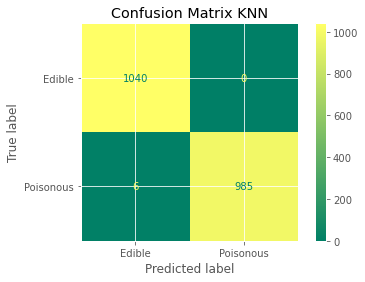

In [21]:
#plot_confusion_matrix of knn 
plot_confusion_matrix(knn, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "summer", normalize= None)
plt.title('Confusion Matrix KNN')
plt.show()

In [22]:
#Print Confusion matrix Accuracy of knn
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))

Confusion matrix Accuracy is: 0.9970457902511078


In [23]:
#classification_report of KNN
KNN_REPORT = classification_report(y_test, knn.predict(X_test))
print(KNN_REPORT)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1040
           1       1.00      0.99      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Random Forest Classifier Model

In [25]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

RandomForestClassifier Accuracy is: 1.0


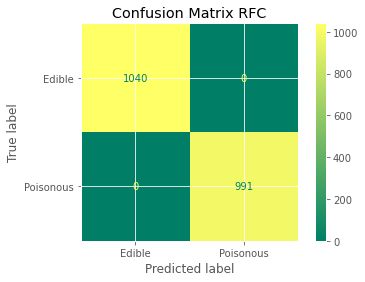

In [26]:
#plot_confusion_matrix of RFC 
plot_confusion_matrix(RFC, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "summer", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [27]:
#Print Confusion matrix Accuracy of RFC
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_predict)))

Confusion matrix Accuracy is: 1.0


In [28]:
#classification_report of RFC
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [29]:
# provide an encoder for the predictor values
Encoder_X = LabelEncoder() 

# encode each of the columns, fit_transform will return the encoded labels
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
    
# provide an encoder for the response values
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

# show the encoded predictors
X.head() 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [30]:
#get dummy variables
# one-hot encode the categorical data
X = pd.get_dummies(X, columns=X.columns,drop_first=True)

# show the encoded predictors
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# split the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#feature scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#apply PCA from sklearn
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
# functions to visualize data
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [35]:
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [36]:
#functions to evalute model preformance 
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Decision Tree Classification Model

In [37]:
classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
#print score
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8936

Standard Deviation:	0.0128


# Logistic Regrssion

In [40]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [42]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0098
